# ***Covid-19 Analysis and Visualization***
### by Umar Khairur Rahman

## **Step 1: Importing Libraries**


In [52]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
from wordcloud import WordCloud

py.init_notebook_mode(connected=True)
pio.renderers.default = 'colab'

## **Step 2: Importing the datasets**

- **covid** - This dataset contains Country/Region, Continent,  Population, TotalCases, NewCases, TotalDeaths, NewDeaths,  TotalRecovered, NewRecovered, ActiveCases, Serious, Critical, Tot Cases/1M pop, Deaths/1M pop, TotalTests, Tests/1M pop, WHO Region, iso_alpha.
- **covid_grouped** - This dataset contains Date(from 20-01-22 to 20-07-27), Country/Region, Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered, WHO Region, iso_alpha.
- **coviddeath** - This dataset contains real-world examples of a number of Covid-19 deaths and the reasons behind the deaths.

In [ ]:
# Importing 1st dataset
dataset1 = pd.read_csv("covid.csv")
dataset1.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region iso_alpha  
0      190640.0        Americas       USA  
1       62085.0        Americas       BRA  
2       16035.0  South-EastAsia       IND  
3      203623.0          Europe       RUS  
4       53044.0          Africa       ZAF

In [8]:
# Returns tuple of shape (Rows, columns)
print(dataset1.shape)

# Returns size of dataframe
print(dataset1.size)

(209, 17)
3553


In [9]:
# Return concise summary of the dataframe
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [10]:
# Importing 2nd dataset
dataset2 = pd.read_csv("covid_grouped.csv")
dataset2.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region iso_alpha  
0           0              0  Eastern Mediterranean       AFG  
1           0              0                 Europe       ALB  
2           0              0                 Africa       DZA  
3           0              0                 Europe       AND  
4           0              0                 Africa       AGO

In [11]:
# Returns tuple of shape (Rows, columns)
print(dataset2.shape)

# Returns size of dataframe
print(dataset2.size)

(35156, 11)
386716


In [12]:
# Return concise summary of the dataframe
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


## **Step 3: Dataset Cleaning**

In [13]:
# Columns labels of a Dataset1
dataset1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

We don't need 'NewCases', 'NewDeaths', 'NewRecovered' columns as they contains NaN values. So drop these columns by drop() function of pandas.

In [14]:
# Drop NewCases, NewDeaths, NewRecovered rows from dataset1

dataset1.drop(['NewCases', 'NewDeaths', 'NewRecovered'], 
              axis=1, inplace=True)

# Select random set of values from dataset1
dataset1.sample(5)

Country/Region      Continent  Population  TotalCases  TotalDeaths  \
183  Turks and Caicos  North America     38768.0         129          2.0   
85              Gabon         Africa   2230563.0        7787         51.0   
140            Cyprus           Asia   1208238.0        1208         19.0   
181           Brunei            Asia    437893.0         141          3.0   
38                UAE           Asia   9902079.0       61845        354.0   

     TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
183            39.0         88.0               3.0            3327.0   
85           5609.0       2127.0              11.0            3491.0   
140           856.0        333.0               NaN            1000.0   
181           138.0          0.0               NaN             322.0   
38          55739.0       5752.0               NaN            6246.0   

     Deaths/1M pop  TotalTests  Tests/1M pop            WHO Region iso_alpha  
183           52.0      1252.0       32295.0                   NaN       TCA  
85            23.0     85369.0       38272.0                Africa       GAB  
140           16.0    216597.0      179267.0                Europe       CYP  
181            7.0     41148.0       93968.0                   NaN       BRN  
38            36.0   5262658.0      531470.0  EasternMediterranean

In [19]:
# Import create_table Figure Factory

from plotly.figure_factory import create_table

colorscale = [[0, '#4d004c'], [.5, '#f2e5ff'], [1, '#ffffff']]
table = create_table(dataset1.head(15), colorscale=colorscale)
py.iplot(table)

## **Step 4: Bar graphs - Comparisons between COVID infected countries in terms of total cases, total deaths, total recovered & total tests**

In [ ]:
px.bar(dataset1.head(15), x = 'Country/Region', 
       y = 'TotalCases',color = 'TotalCases', 
       height = 500,hover_data = ['Country/Region', 'Continent'], title = 'Total Cases in Top 15 Countries',)

In [73]:
px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases',
       color = 'TotalDeaths', height = 500,
       hover_data = ['Country/Region', 'Continent'], title = 'Total Deaths in Top 15 Countries',)

In [74]:
px.bar(dataset1.head(15), x = 'TotalTests', y = 'Country/Region',
       color = 'TotalTests',orientation ='h',  height = 500,
       hover_data = ['Country/Region', 'Continent'], title = 'Total Tests in Top 15 Countries',)

In [75]:
px.bar(dataset1.head(15), x = 'TotalTests', y = 'Continent',
       color = 'TotalTests',orientation ='h',  height = 500,
       hover_data = ['Country/Region', 'Continent'], title = 'Total Tests in Every Continent',)

## **Step 5: Data Visualization through Bubble Charts-Continent Wise**

In [76]:
px.scatter(dataset1, x='Continent',y='TotalCases', 
           hover_data=['Country/Region', 'Continent'], 
           color='TotalCases', size='TotalCases', size_max=80, title = 'Total Cases in Every Continent',)

## **Step 6: Data Visualization through Bubble Charts-Country Wise**

In [77]:
px.scatter(dataset1.head(30), x='Country/Region', y= 'Tests/1M pop', 
           hover_data=['Country/Region', 'Continent'],
           color='Country/Region', size= 'Tests/1M pop', size_max=80, title = 'Total Tests per 1M Population in Every Country',)

## **Step 7: Advanced Data Visualization - Bar graphs for All top infected Countries**

In [78]:
px.bar(dataset2, x="Date", y="Confirmed", color="Confirmed", 
       hover_data=["Confirmed", "Date", "Country/Region"], height=400, title = 'Top Infected Countries',)

## **Step 8: Countries Specific COVID Data Visualization: (Indonesia)**

In [33]:
df_INA= dataset2.loc[dataset2["Country/Region"]=="Indonesia"]
df_INA.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  \
80   2020-01-22      Indonesia          0       0          0       0   
267  2020-01-23      Indonesia          0       0          0       0   
454  2020-01-24      Indonesia          0       0          0       0   
641  2020-01-25      Indonesia          0       0          0       0   
828  2020-01-26      Indonesia          0       0          0       0   

     New cases  New deaths  New recovered       WHO Region iso_alpha  
80           0           0              0  South-East Asia       IDN  
267          0           0              0  South-East Asia       IDN  
454          0           0              0  South-East Asia       IDN  
641          0           0              0  South-East Asia       IDN  
828          0           0              0  South-East Asia       IDN

In [80]:
# Bar chart for confirmed cases in Indonesia
px.bar(df_INA, x="Date", y="Confirmed", color="Confirmed", height=400, title = 'Confirmed Cases in Indonesia',)

In [81]:
# Line chart for recovered cases in Indonesia
px.line(df_INA,x="Date", y="Recovered", height=400, 
        title = 'Recovered Cases in Indonesia',)

In [82]:
# Bar chart for new cases in Indonesia
px.bar(df_INA,x="Date", y="New cases", height=400, 
       title = 'New Cases in Indonesia',)

## **Step 9: Visualization of Data in terms of Maps**

In [84]:
px.choropleth(dataset2,
              locations="iso_alpha",
              color="Confirmed",
              hover_name="Country/Region", 
              color_continuous_scale="Blues",
              animation_frame="Date",)

This creates an animation containing visualizations from January to July 2020. Playing this animation will make it more clear how the virus spread around the world. The darker the color, the higher the confirmed cases are.

In [43]:
px.choropleth(dataset2,
              locations='iso_alpha',
              color="Deaths",
              hover_name="Country/Region",
              color_continuous_scale="Viridis",
              animation_frame="Date" )

This code creates an animation of death cases by date. By playing this animation it will be shown how deaths increase around the world.

In [45]:
px.choropleth(dataset2,
              locations='iso_alpha',
              color="Recovered",
              hover_name="Country/Region",
              color_continuous_scale="RdYlGn",
              projection="natural earth",
              animation_frame="Date" )

By running the output, things start to become more clear about how the recovery rate changes with respect to the date.

In [46]:
px.bar(dataset2, x="WHO Region", y="Confirmed", color="WHO Region", 
       animation_frame="Date", hover_name="Country/Region")

When running the output, the animation will run from January to July 2020. It will show 6 different bar graphs, each continent has its own color representing the confirmed cases.

## **Step 10: Visualize Cause of Death using Word Cloud**

In [47]:
dataset3= pd.read_csv("coviddeath.csv")
dataset3.head()

Data as of  Start Week    End Week State       Condition Group  \
0  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
1  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
2  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
3  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
4  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   

                 Condition ICD10_codes Age Group  Number of COVID-19 Deaths  \
0  Influenza and pneumonia     J09-J18      0-24                      122.0   
1  Influenza and pneumonia     J09-J18     25-34                      596.0   
2  Influenza and pneumonia     J09-J18     35-44                     1521.0   
3  Influenza and pneumonia     J09-J18     45-54                     4186.0   
4  Influenza and pneumonia     J09-J18     55-64                    10014.0   

  Flag  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [48]:
dataset3.tail()

Data as of  Start Week    End Week State           Condition Group  \
12255  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12256  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12257  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12258  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12259  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   

      Condition ICD10_codes   Age Group  Number of COVID-19 Deaths  \
12255  COVID-19        U071       65-74                     5024.0   
12256  COVID-19        U071       75-84                     5381.0   
12257  COVID-19        U071         85+                     4841.0   
12258  COVID-19        U071  Not stated                        NaN   
12259  COVID-19        U071    All ages                    20628.0   

                                  Flag  
12255                              NaN  
12256                              NaN  
12257                              NaN  
12258  Counts less than 10 suppressed.  
12259                              NaN

In [49]:
dataset3.groupby(["Condition"]).count()

Data as of  Start Week  \
Condition                                                                    
Adult respiratory distress syndrome                        540         540   
All other conditions and causes (residual)                 540         540   
Alzheimer disease                                          530         530   
COVID-19                                                   540         540   
Cardiac arrest                                             520         520   
Cardiac arrhythmia                                         540         540   
Cerebrovascular diseases                                   530         530   
Chronic lower respiratory diseases                         540         540   
Diabetes                                                   540         540   
Heart failure                                              540         540   
Hypertensive diseases                                      540         540   
Influenza and pneumonia                                    540         540   
Intentional and unintentional injury, poisoning...         520         520   
Ischemic heart disease                                     540         540   
Malignant neoplasms                                        540         540   
Obesity                                                    530         530   
Other diseases of the circulatory system                   530         530   
Other diseases of the respiratory system                   540         540   
Renal failure                                              540         540   
Respiratory arrest                                         480         480   
Respiratory failure                                        540         540   
Sepsis                                                     530         530   
Vascular and unspecified dementia                          530         530   

                                                    End Week  State  \
Condition                                                             
Adult respiratory distress syndrome                      540    540   
All other conditions and causes (residual)               540    540   
Alzheimer disease                                        530    530   
COVID-19                                                 540    540   
Cardiac arrest                                           520    520   
Cardiac arrhythmia                                       540    540   
Cerebrovascular diseases                                 530    530   
Chronic lower respiratory diseases                       540    540   
Diabetes                                                 540    540   
Heart failure                                            540    540   
Hypertensive diseases                                    540    540   
Influenza and pneumonia                                  540    540   
Intentional and unintentional injury, poisoning...       520    520   
Ischemic heart disease                                   540    540   
Malignant neoplasms                                      540    540   
Obesity                                                  530    530   
Other diseases of the circulatory system                 530    530   
Other diseases of the respiratory system                 540    540   
Renal failure                                            540    540   
Respiratory arrest                                       480    480   
Respiratory failure                                      540    540   
Sepsis                                                   530    530   
Vascular and unspecified dementia                        530    530   

                                                    Condition Group  \
Condition                                                             
Adult respiratory distress syndrome                             540   
All other conditions and causes (residual)                      540   
Alzheimer disease                        

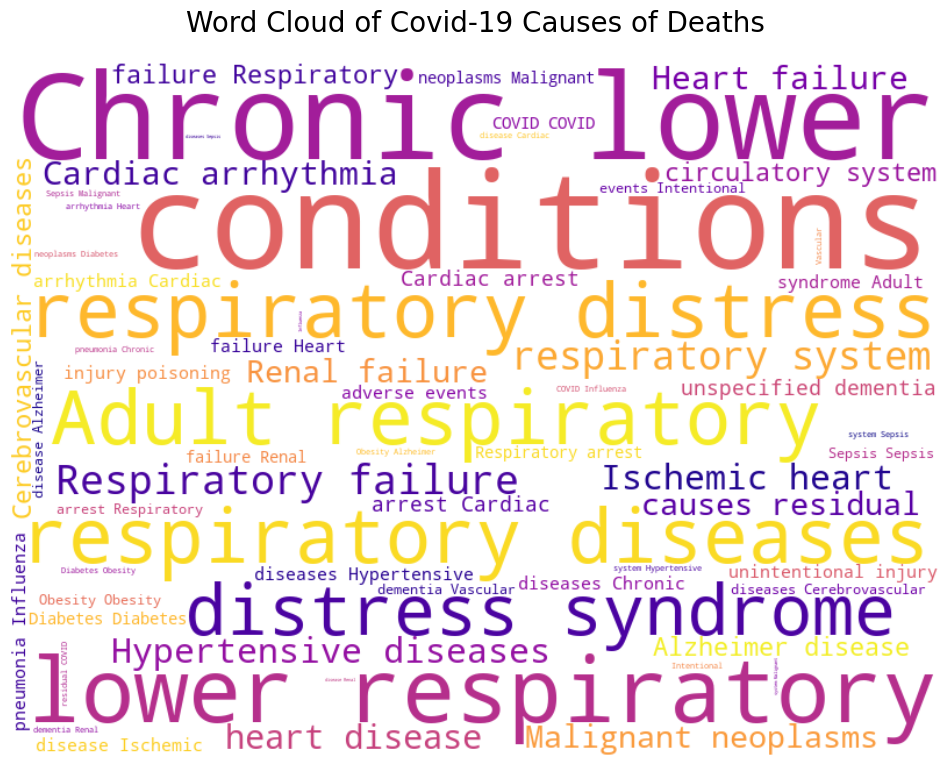

In [89]:
sentences = dataset3["Condition"].tolist()
sentences_as_a_string = ' '.join(sentences)

wordcloud = WordCloud(
    background_color='white', 
    colormap='plasma',       
    width=800,               
    height=600,               
    max_words=100,            
    contour_width=1,          
    contour_color='steelblue'
).generate(sentences_as_a_string)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Covid-19 Causes of Deaths', fontsize=20, pad=20)
plt.axis("off") 
plt.show()

From the output, it can be clearly seen that the leading cause of death is Influenza Pneumonia.

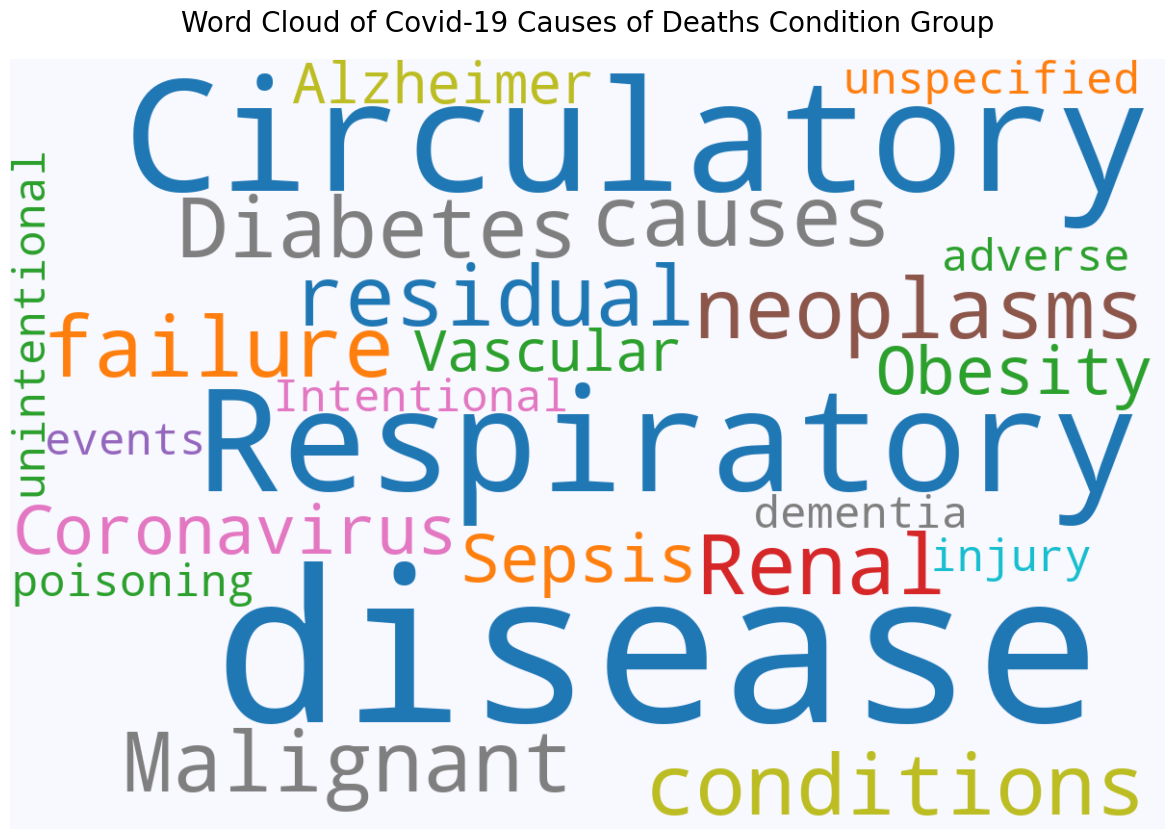

In [90]:
column2_tolist= dataset3["Condition Group"].tolist()

# Convert the list to one single string
column_to_string= " ".join(column2_tolist)

# Convert the string into WordCloud
wordcloud1 = WordCloud(
    width=1200,
    height=800,
    background_color='ghostwhite',
    colormap='tab10',             
    random_state=42,             
    collocations=False           
).generate(column_to_string)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Covid-19 Causes of Deaths Condition Group', fontsize=20, pad=20)
plt.show()

Here, respiratory diseases are the major cause of death followed by circulatory diseases which are cardiovascular diseases.